In [1]:
import os 
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
data = "chest_xray"

In [3]:
os.listdir(data)

['test', 'train']

In [4]:
train_path = data+'\\train\\'
test_path = data+'\\test\\'

In [5]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

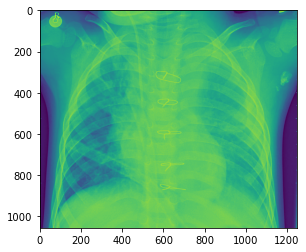

In [6]:
normal= 'sick.jpeg'
normal = imread(normal)
plt.imshow(normal)

In [7]:
imageDimensions= (130,130,3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen = ImageDataGenerator(rotation_range = 5, # rotate the image 20 degrees
                               width_shift_range = 0.05, # Shift the pic width by a max of 5%
                               height_shift_range = 0.05, # Shift the pic height by a max of 5%
                               rescale =1/255, # Rescale the image by normalzing it.
                               shear_range = 0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range = 0.1, # Zoom in by 10% max
                               horizontal_flip= True, # Allo horizontal flipping
                               fill_mode = 'reflect' # Fill in missing pixels with the nearest filled value
                              )

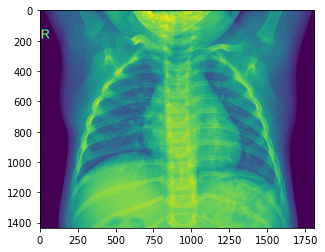

In [10]:
cell = train_path+'\\NORMAL\\'+os.listdir(train_path+'\\NORMAL\\')[2]
cell = imread(cell)
plt.imshow(cell)

In [11]:
image_gen.flow_from_directory(train_path)

Found 5216 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory(test_path)

Found 624 images belonging to 2 classes.


In [13]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(130,130),
                                               batch_size=16,
                                               class_mode='binary',seed=123)

Found 5216 images belonging to 2 classes.


In [14]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               batch_size=16,
                                               class_mode='binary',seed=123)

Found 624 images belonging to 2 classes.


In [15]:
classes=train_image_gen.class_indices
classes

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [17]:
model = Sequential()
#1
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=imageDimensions, activation='relu',))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(3, 3)))
#2
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=imageDimensions, activation='relu',))
#3
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=imageDimensions, activation='relu',))

#4
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=imageDimensions, activation='relu',))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
results = model.fit_generator(train_image_gen,
                              epochs=10,
                              validation_data=test_image_gen,
                              steps_per_epoch= 100,
                              validation_steps = 50
                             )
                          
                             

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 41s 408ms/step - loss: 0.5963 - accuracy: 0.7300 - val_loss: 0.5935 - val_accuracy: 0.6266
Epoch 2/10
100/100 [==============================] - 31s 308ms/step - loss: 0.3801 - accuracy: 0.8338
Epoch 3/10
100/100 [==============================] - 39s 389ms/step - loss: 0.2922 - accuracy: 0.8788
Epoch 4/10
100/100 [==============================] - 41s 411ms/step - loss: 0.2721 - accuracy: 0.8919
Epoch 5/10
100/100 [==============================] - 41s 414ms/step - loss: 0.2469 - accuracy: 0.9056
Epoch 6/10
100/100 [==============================] - 40s 403ms/step - loss: 0.2484 - accuracy: 0.9044
Epoch 7/10
100/100 [==============================] - 42s 416ms/step - loss: 0.2318 - accuracy: 0.9156
Epoch 8/10
100/100 [==============================] - 40s 404ms/step - loss: 0.2083 - accuracy: 0.9244
Epoch 9/10
100/100 [==============================] - 42s 

In [22]:
#evaluating the model
score = model.evaluate(test_image_gen,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.5097988247871399
Test Accuracy = 0.7628205418586731


In [23]:
model.save('my_model.h5')

# Predicting the Model

In [1]:
import cv2
import os 
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model = load_model('my_model.h5') # load the model 

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [4]:
data = 'val' #validation images file

In [5]:
files = os.listdir(data)

In [6]:
for i in files:
    img = cv2.imread(os.path.join(data,i))
    img = cv2.resize(img,(130,130))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    class_pred = model.predict_classes([img])[0]
    sing = class_pred
    pred = model.predict(img)
    prob_val = np.amax(pred)
    if sing == 0:
        sing ='NORMAL'
    elif sing ==1:
        sing ='PNEUMONIA'
    
    print('class:',sing,'prob_value:',prob_val)
    
    

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
class: PNEUMONIA prob_value: 1.0
class: NORMAL prob_value: 0.0
class: NORMAL prob_value: 2.048209e-13
class: NORMAL prob_value: 0.0
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
class: NORMAL prob_value: 0.0
class: NORMAL prob_value: 0.0
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
class: NORMAL prob_value: 1.949099e-07
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
class: PNEUMONIA prob_value: 1.0
